In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

## Load the training set and validation set.

In [2]:
N_FEATURES = 123

X_train, y_train = load_svmlight_file('a9a', n_features=N_FEATURES)
X_val, y_val = load_svmlight_file('a9a.t', n_features=N_FEATURES)

y_train = y_train.reshape(y_train.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)

y_train[y_train == -1] = 0
y_val[y_val == -1] = 0

## parameter

In [3]:
EPOCH_NUM = 250
BATCH_SIZE = 64
LR = 2e-4
PENALTY_FACTOR = 0.5

## Log-likehood Loss function 

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(y_, y):
    return -1/y.shape[0] * (y*np.log(sigmoid(y_)) + (1-y)*np.log(1-sigmoid(y_))).sum()

## Initialize logistic regression model parameter with normal distribution

In [5]:
w = np.random.normal(1, 1, size=(N_FEATURES, 1))

## MSGD

In [6]:
batch_idxs_pool = np.arange(X_train.shape[0])

losses_train, losses_val = [], []
accs_train, accs_val = [], []

for epoch in range(EPOCH_NUM):
    for step in range(X_train.shape[0] // BATCH_SIZE):
        batch_idx = np.random.choice(batch_idxs_pool, size=BATCH_SIZE)
        X, y = X_train[batch_idx], y_train[batch_idx]
        
        grad = X.T.dot(sigmoid(X.dot(w))-y) # + PENALTY_FACTOR*w
        grad = -grad / X.shape[0]
        
        w += LR * grad
    
    output_train, output_val = X_train.dot(w), X_val.dot(w)
    
    losses_train.append(loss(output_train, y_train))
    losses_val.append(loss(output_val, y_val))
    
    output_train[sigmoid(output_train) > 0.5] = 1
    output_train[sigmoid(output_train) <= 0.5] = 0
    
    output_val[sigmoid(output_val) > 0.5] = 1
    output_val[sigmoid(output_val) <= 0.5] = 0
    
    accs_train.append(np.count_nonzero(output_train == y_train)/X_train.shape[0])
    accs_val.append(np.count_nonzero(output_val == y_val)/X_val.shape[0])
    
    if epoch % 15 == 0:
        print('Epoch: #{}\tLoss_train: {:.4f}\tLoss_val: {:.4f}\tAcc_train: {:.4f}\tAcc_val: {:.4f}'.format(
        epoch+1, losses_train[-1], losses_val[-1], accs_train[-1], accs_val[-1])
    )

Epoch: #1	Loss_train: 10.6844	Loss_val: 10.7577	Acc_train: 0.2408	Acc_val: 0.2362
Epoch: #16	Loss_train: 5.2510	Loss_val: 5.2922	Acc_train: 0.2411	Acc_val: 0.2368
Epoch: #31	Loss_train: 2.0271	Loss_val: 2.0362	Acc_train: 0.3946	Acc_val: 0.3917
Epoch: #46	Loss_train: 1.3755	Loss_val: 1.3737	Acc_train: 0.5463	Acc_val: 0.5463
Epoch: #61	Loss_train: 1.1900	Loss_val: 1.1849	Acc_train: 0.6208	Acc_val: 0.6181
Epoch: #76	Loss_train: 1.0900	Loss_val: 1.0842	Acc_train: 0.6531	Acc_val: 0.6505
Epoch: #91	Loss_train: 1.0165	Loss_val: 1.0107	Acc_train: 0.6713	Acc_val: 0.6699
Epoch: #106	Loss_train: 0.9569	Loss_val: 0.9515	Acc_train: 0.6848	Acc_val: 0.6820
Epoch: #121	Loss_train: 0.9071	Loss_val: 0.9022	Acc_train: 0.6956	Acc_val: 0.6951
Epoch: #136	Loss_train: 0.8650	Loss_val: 0.8605	Acc_train: 0.7042	Acc_val: 0.7043
Epoch: #151	Loss_train: 0.8290	Loss_val: 0.8248	Acc_train: 0.7128	Acc_val: 0.7117
Epoch: #166	Loss_train: 0.7981	Loss_val: 0.7941	Acc_train: 0.7191	Acc_val: 0.7194
Epoch: #181	Loss_train

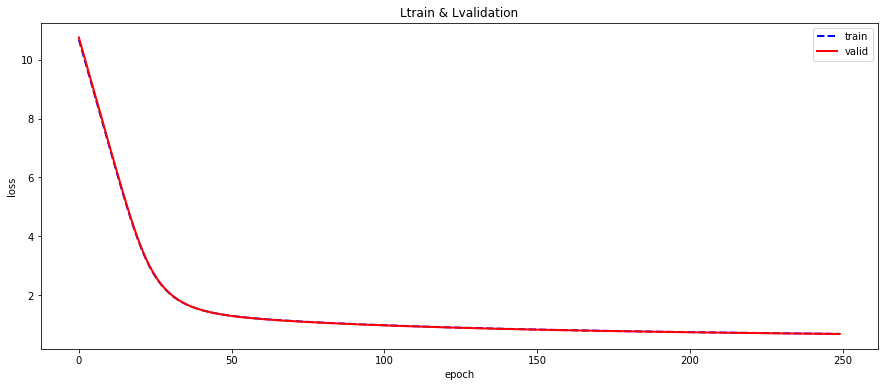

In [8]:
plt.figure(figsize=[15,6])
plt.title('Ltrain & Lvalidation')
plt.plot(losses_train, '--', c='b',linewidth=2, label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses_val, c='r', linewidth=2, label='valid')
plt.legend()
plt.savefig('logistics-regression-losses.png')
plt.show()

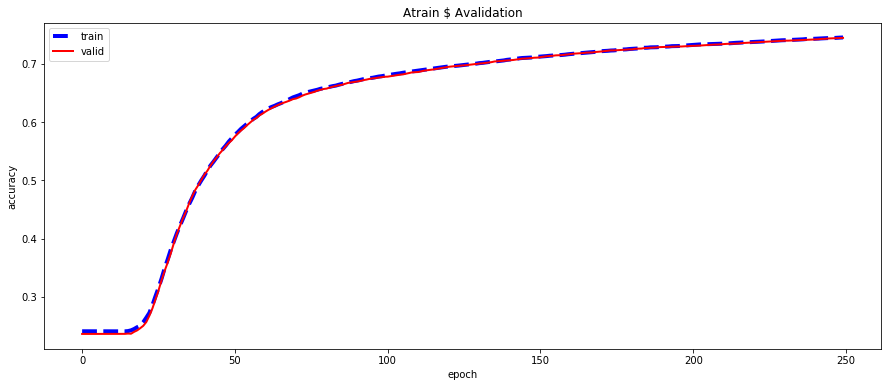

In [9]:
plt.figure(figsize=[15,6])
plt.title('Atrain $ Avalidation')
plt.plot(accs_train, '--', c='b',linewidth=4, label='train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accs_val, c='r', linewidth=2, label='valid')
plt.legend()
plt.savefig('logistics-regression-accuracy.png')
plt.show()